# Data Preparation

In [162]:
# Initial Imports
import pandas as pd

In [163]:
# Load CSV in Pandas DataFrame
csv_file = "Resources/crypto_data.csv"
crypto_df = pd.read_csv(csv_file, encoding = "utf-8")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [164]:
# Determine the data types of the columns
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [165]:
# Determine the number of rows in the DataFrame
print(f"DataFrame rows = {len(crypto_df)}")

DataFrame rows = 1252


In [166]:
# Discard all cryptocurrencies that are not being trader (IsTrading = FALSE)
crypto_df_A = crypto_df[crypto_df["IsTrading"] == True]
crypto_df_A = crypto_df_A.drop(['IsTrading'], axis=1)
print(f"DataFrame rows = {len(crypto_df_A)}")
crypto_df_A.head()

DataFrame rows = 1144


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [167]:
# Remove all rows that have at least one null value
crypto_df_B = crypto_df_A.dropna()
print(f"DataFrame rows = {len(crypto_df_B)}")

DataFrame rows = 685


In [168]:
# Filter or cryptocurrencies that have been mined (TotalCoinsMined > 0)
crypto_df_C = crypto_df_B[crypto_df_B['TotalCoinsMined'] > 0]
print(f"DataFrame rows = {len(crypto_df_C)}")

DataFrame rows = 532


In [169]:
# Dataet needs to be numeric to be comprehensible to a machine learning algorithm
# Delete the coin name from the DataFrame since it is not applicable to the exercise
crypto_df_D = crypto_df_C.drop(['Unnamed: 0', 'CoinName'], axis=1)
print(f"DataFrame rows = {len(crypto_df_D)}")
crypto_df_D.head()

DataFrame rows = 532


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [170]:
# Convert column TotalCoinSupply from object to float64
crypto_df_D['TotalCoinSupply'] = crypto_df_D['TotalCoinSupply'].astype(float)
crypto_df_D.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [171]:
# Convert Algorithm and ProofType into numeric data using dummy variables.  
crypto_df_E = pd.get_dummies(crypto_df_D)
crypto_df_E

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first attempt at creating the dummy variables, there was a total of 909 columns generated.  The TotalCoinSupply column was also treated like text, so each unique value created a dummy variable.  Once that column was converted to a float, then then number of columns dropped to 98 which seemed more realistic based on the value counts of the Algorithm and ProofType. 

In [172]:
# Scale the TotalCoinsMined and TotalCoinSupply so that they do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crypto_df_E_scaled = scaler.fit_transform(crypto_df_E)

# Dimensionality Reduction

In [173]:
# Perform dimensionality reduction with PCA, preserving 90% of the explained variance in dimensionality reduction.  
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=0.90)

# Get the principal components for the DataFrame
crypto_pca = pca.fit_transform(crypto_df_E_scaled)

# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df.head()


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,1.521877e-14,6.084723e-12,-1.333584e-14,-0.007129,-1.319756,-0.051813,...,1.396622e-15,2.994630e-15,-1.720259e-15,3.012636e-15,-1.285480e-15,-3.652955e-15,-4.934728e-16,-1.674978e-15,-3.441833e-15,-2.210606e-15
1,-0.318434,1.032331,-0.591126,0.001386,1.509791e-14,6.034637e-12,-1.333913e-14,-0.007739,-1.322514,-0.056674,...,1.131156e-15,2.948589e-15,-2.388099e-15,3.402007e-15,-1.462669e-15,-3.534023e-15,-1.751190e-16,-1.777395e-15,-3.996239e-15,-1.725659e-15
2,2.305468,1.656383,-0.683617,0.004731,2.089423e-14,2.071047e-11,-1.668171e-14,-0.054781,-1.542879,-0.943951,...,5.664310e-14,-5.934676e-14,3.583046e-15,-4.684019e-15,-2.954420e-14,-4.220783e-15,1.043077e-13,2.154074e-14,-3.736160e-14,4.321225e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-6.424938e-15,-5.378752e-12,3.915136e-15,-0.002071,0.281463,0.251862,...,1.835785e-15,-1.132464e-14,5.360012e-15,-1.270644e-14,-4.498175e-15,6.969587e-18,1.532434e-14,-6.026699e-15,-1.149332e-14,2.992710e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-1.127310e-14,-7.455836e-12,1.234000e-14,0.027735,0.519099,0.188820,...,2.172033e-14,-3.069594e-14,-1.240076e-14,1.056742e-14,-1.011515e-13,-8.883307e-14,7.128194e-14,-8.110982e-14,2.334967e-14,2.807822e-13


After running the PCA on the DataFrame, there appears to be 74 features that explain 90% of the variance.  This is a reduction of 24 columns (24%).  

In [174]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.  
# Run t-SNE on the PCA output.  
from sklearn.manifold import TSNE

# Initialize the t-SNE mod100
tsne = TSNE(learning_rate=20)

# Reduce the number of dimensions
crypto_tsne_df = crypto_pca_df
tsne_features = tsne.fit_transform(crypto_tsne_df)

tsne_features.shape

C:\Users\jcbat\anaconda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

Reducing the dataset using t-SNE, the features were reduced down to two.  

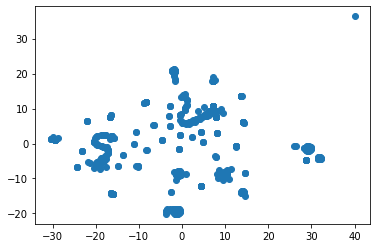

In [175]:
# Create a scatter plot of the t-SNE output.

# The first column of transformed features
crypto_tsne_df_plot = crypto_tsne_df
crypto_tsne_df_plot['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_tsne_df_plot['y'] = tsne_features[:,1]

# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(crypto_tsne_df_plot['x'], crypto_tsne_df_plot['y'])
plt.show()

Utilized different learning rates to determine if clusters were more distinct.  Settled on a learning rate of 20.
Looking at the cluster plot, there appears to be about 4 or 5 clusters.  Two larger ones, and three smaller ones. 

# Cluster Analysis with k-Means

C:\Users\jcbat\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jcbat\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jcbat\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jcbat\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

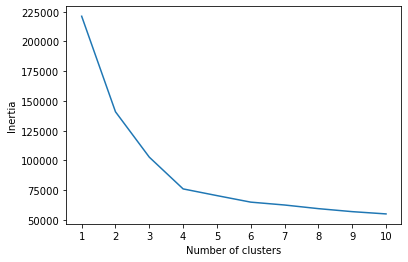

In [176]:
# Elbow plot to identify the best number of clusters.  
from sklearn.cluster import KMeans

# Use a for loop to determine the inertia for each k between 1 through 10.  
inertia = []

# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Look for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
# Define a DataFrame to plot the Elbow Curve using kvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Looking at the elbow curve, it appears that the elbow of the plot is around 4 clusters.

# Recommendation

Based on the unsupervised machine learning project, utilizing PCA, t-SNE and k-means to narrow down the critical features and determine potential clusters, it is concluded that there appears to be some distinct clusters in the data.  Based on the t-SNE analysis scatter plot showing about 4 - 5 clusters, and the k-Means elbow plot backing up the hypothesis with a bend in the curve at k=4, it appears that the cryptocurrency data can be categorized into four clusters.